#### Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [25]:
df.isnull().sum()

Scores    0
dtype: int64

#### Plot to see how the data points lie on the graph

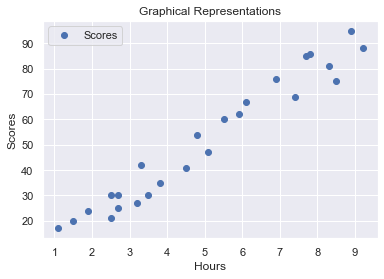

In [5]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Graphical Representations')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

#### Train-test split

In [6]:
X = df.drop('Hours', axis=1)
y = df.pop('Hours')

y.head()

0    2.5
1    5.1
2    3.2
3    8.5
4    3.5
Name: Hours, dtype: float64

In [7]:
X.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

#### Applying Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(x_train, y_train) 

LinearRegression()

In [10]:
lm.coef_

array([0.09689874])

In [11]:
lm.intercept_

0.046857663699683805

In [12]:
X.head()

,Scores
0,21
1,47
2,27
3,75
4,30


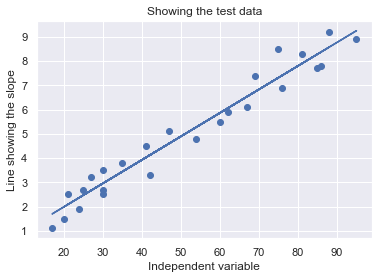

In [13]:
#y=mx+c
mx = lm.coef_ * X + lm.intercept_


plt.scatter(X, y)
plt.plot(X, mx)
plt.title("Showing the test data")
plt.xlabel('Independent variable')
plt.ylabel('Line showing the slope')
plt.show()

In [14]:
y_predicted = lm.predict(X)
y_predicted

array([2.08173113, 4.60109827, 2.66312354, 7.31426289, 2.95381975,
       1.98483239, 8.57394646, 5.86078184, 7.89565531, 2.46932607,
       8.28325025, 6.05457932, 4.01970585, 4.11660459, 1.69413618,
       9.25223761, 2.95381975, 2.37242734, 6.539073  , 6.73287047,
       2.95381975, 5.27938942, 3.43831343, 7.41116162, 8.38014899])

In [15]:
y_predicted1 = lm.predict(x_test)
y_predicted1

array([1.98483239, 2.66312354, 6.73287047, 2.95381975, 6.05457932,
       3.43831343, 2.37242734, 8.38014899])

In [16]:
y_predicted = lm.predict(x_train)
y_predicted

array([7.41116162, 1.69413618, 4.60109827, 8.28325025, 4.11660459,
       7.89565531, 8.57394646, 6.539073  , 2.95381975, 2.46932607,
       5.86078184, 2.95381975, 7.31426289, 2.08173113, 5.27938942,
       9.25223761, 4.01970585])

In [17]:
dm = pd.DataFrame({'Actual':y_test, 'Predicted':y_predicted1})
dm

,Actual,Predicted
5,1.5,1.984832
2,3.2,2.663124
19,7.4,6.732870
16,2.5,2.953820
11,5.9,6.054579
22,3.8,3.438313
17,1.9,2.372427
24,7.8,8.380149


In [23]:
time = np.array([9.25])
new_pred = lm.predict(time.reshape(1,-1))
print("The child studying for 9.25 hours/day will get", round(new_pred[0],2)*100, "marks")

The child studying for 9.25 hours/day will get 94.0 marks
